<a href="https://colab.research.google.com/github/YarkoMarko/Pipeline/blob/main/module3/%D0%94%D0%97_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/House_Rent_Dataset.csv", index_col="Unnamed: 0")

[Інформація про дані](https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset)

In [3]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2.0,10000.0,1100.0,Ground out of 2,NaN,NaN,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner
1,2022-05-13,2.0,20000.0,800.0,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,NaN
2,2022-05-16,2.0,17000.0,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
3,2022-07-04,2.0,10000.0,800.0,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner
4,NaN,2.0,7500.0,850.0,1 out of 2,Carpet Area,NaN,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner


In [4]:
df = df[['Rent', 'Size', 'Furnishing Status', 'City']]
df.head()

,Rent,Size,Furnishing Status,City
0,10000.0,1100.0,Unfurnished,Kolkata
1,20000.0,800.0,Semi-Furnished,Kolkata
2,17000.0,1000.0,Semi-Furnished,Kolkata
3,10000.0,800.0,Unfurnished,Kolkata
4,7500.0,850.0,Unfurnished,Kolkata


# Завдання 1
Очистіть дані від викидів, розділіть на тренувальну та тестову чатини

<Axes: >

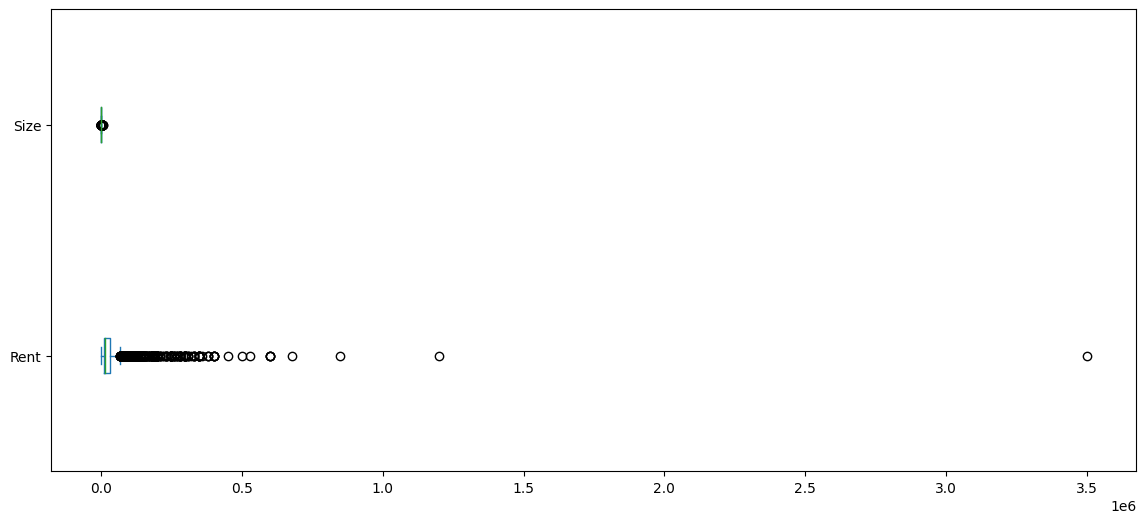

In [7]:
df.plot(kind="box", vert=False, figsize=(14, 6))

In [8]:
df.shape

(4746, 4)

In [9]:
def remove(column, df):
  column_ = df[column]

  q1 = column_.quantile(q=0.25)
  q3 = column_.quantile(q=0.75)
  iqr = q3 - q1

  lower = q1 - iqr * 1.5
  upper = q3 + iqr * 1.5

  mask = (column_ >= lower) & (column_ <= upper)

  return df[mask]

for column in df.select_dtypes(include="number").columns:
  df = remove(column, df)

In [10]:
df.shape

(3500, 4)

<Axes: >

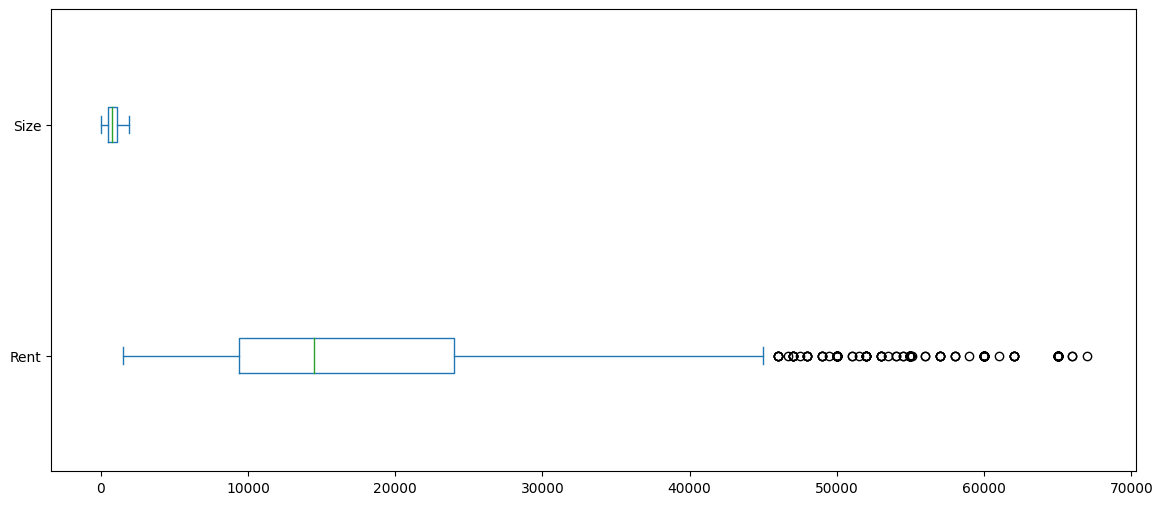

In [12]:
df.plot(kind="box", vert=False, figsize=(14, 6))

In [13]:
y = df["Rent"]
X = df.drop(columns="Rent")

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Завдання 2
Створіть Pipeline для обробки числових стовпчиків(заповнення пропусків)

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [16]:
num_columns = X.select_dtypes(include="number").columns
cat_columns = X.select_dtypes(include="object").columns

In [22]:
num_columns

Index(['Size'], dtype='object')

In [17]:
num_transformer = Pipeline(
    steps = [
        ("imputer", SimpleImputer(strategy="median"))
    ]
)

# Завдання 3
Створіть Pipeline для обробки категоріальних стовпчиків(заповнення пропусків та кодування)

In [19]:
cat_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(sparse_output=False))
    ]
)

# Завдання 4
Об'єднайте попередні Pipeline в один ColumnTransformer

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_columns),
        ("cat", cat_transformer, cat_columns)
    ]
)

preprocessor.set_output(transform="pandas")

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['Size'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 Index(['Furnishing Status', 'City'], dtype='object'))])

In [21]:
preprocessor.fit(X_train)
preprocessor.transform(X_train)

,num__Size,cat__Furnishing Status_Furnished,cat__Furnishing Status_Semi-Furnished,cat__Furnishing Status_Unfurnished,cat__City_Bangalore,cat__City_Chennai,cat__City_Delhi,cat__City_Hyderabad,cat__City_Kolkata,cat__City_Mumbai
187,750.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1538,450.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2442,450.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1541,500.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1825,1080.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1656,800.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1696,450.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1898,1100.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1288,888.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Завдання 5
Створіть остаточну модель та натренуйте її

In [24]:
from sklearn.linear_model import LinearRegression

model = Pipeline(
    steps=[
        ("prop", preprocessor),
        ("model", LinearRegression())
    ]
)

model

Pipeline(steps=[('prop',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['Size'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  Index(['Furnishing Status', 'City'], dtype='object'))])),
                ('model', LinearRegression())])

In [25]:
model.fit(X_train, y_train)

Pipeline(steps=[('prop',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['Size'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  Index(['Furnishing Status', 'City'], dtype='object'))])),
                ('model', LinearRegression())])

# Завдання 6
Виведіть основні метрики моделі

In [30]:
from sklearn import metrics

y_pred = model.predict(X_test)

def get_metrics(y_true, y_pred, name="model"):
  df_ = pd.DataFrame()

  df_.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df_.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df_.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df_.round(2)

In [31]:
all_metrics = pd.DataFrame()

In [32]:
all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, y_pred)
all_metrics["mean"] = get_metrics(y_test, np.full_like(y_test, y_test.mean()), "mean")

In [33]:
all_metrics

,train,test,mean
MAE,6417.22,6628.66,10237.26
RMSE,9103.38,9312.05,13615.53
R2,0.53,0.53,0.00


# Завдання 7
Збережіть модель, завантажте її та спрогнозуйте ціну автомобіля

In [34]:
import joblib

joblib.dump(model, "model_file.pkl")

['model_file.pkl']

In [35]:
loader = joblib.load("model_file.pkl")
loader

Pipeline(steps=[('prop',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['Size'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  Index(['Furnishing Status', 'City'], dtype='object'))])),
                ('model', LinearRegression())])

In [36]:
data = pd.DataFrame({'Size': [900],
                     'Furnishing Status': ['Semi-Furnished'],
                     'City': ['Mumbai']})

y_ = loader.predict(data)

In [38]:
y_

array([40380.85014142])